In [1]:
import sys
sys.path.append("..")
from ProbabilisticParcellation.util import *
import ProbabilisticParcellation.parcel_hierarchy as ph
from Functional_Fusion.dataset import * 
import matplotlib.pyplot as plt

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
    

## Load parcellation

In [2]:
mname = 'Models_04/sym_MdPoNiIb_space-MNISymC3_K-34'
fileparts = mname.split('/')
split_mn = fileparts[-1].split('_')
info,model = load_batch_best(mname)


## Similarity structure across datasets

<Figure size 2000x500 with 0 Axes>

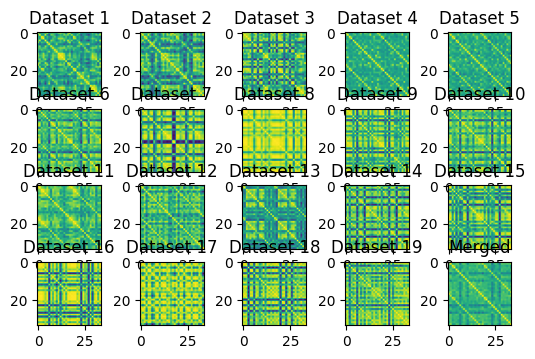

In [3]:
plt.figure(figsize=(20,5))
w_cos_sim,_,_ = ph.parcel_similarity(model,plot=True,sym=False)

## Cluster in groups

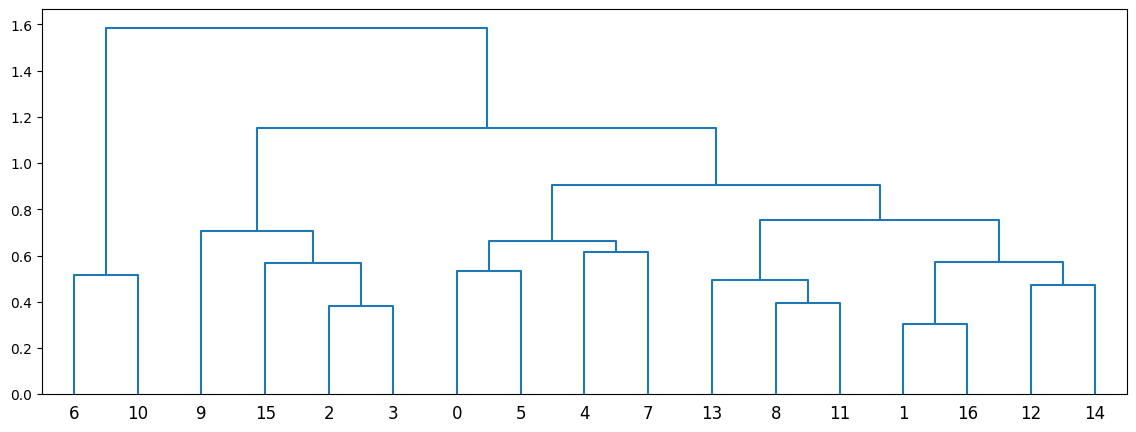

In [4]:
plt.figure(figsize=(14,5))
sym=True
w_cos_sym,_,_ = ph.parcel_similarity(model,plot=False,sym=sym)
labels,clusters,leaves = ph.agglomative_clustering(w_cos_sym,sym=sym,method='ward',num_clusters=5)

## Make colormap

In [5]:
W = ph.calc_mds(w_cos_sim,center=True)
V=np.array([[-0.3,-0.6,1],[1,-.6,-.7],[1,1,1]]).T
V=ph.make_orthonormal(V)
m = np.array([0.65,0.65,0.65])
l = np.array([1,1,1])
# cmap = ph.colormap_mds(w_cos_sim,target=None,clusters=clusters,gamma=0.3)
cmap = ph.colormap_mds(W,target=(m,l,V),clusters=clusters,gamma=0.1)



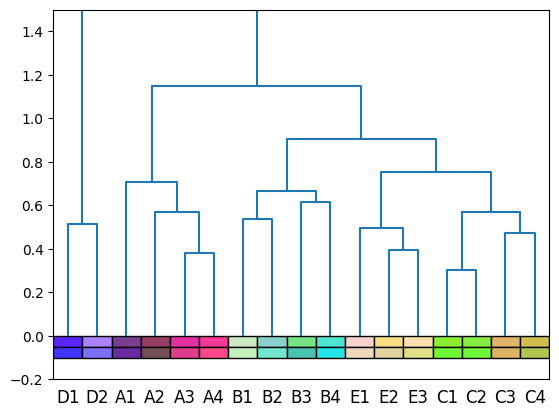

In [6]:
# Plot the clustering with the color map
labels,clusters,leaves = ph.agglomative_clustering(w_cos_sym,sym=sym,cmap=cmap,method='ward',num_clusters=5)

In [7]:
# Plot the parcellation
Prop = np.array(model.marginal_prob())
parcel = Prop.argmax(axis=0)+1
atlas = split_mn[2][6:]

ax = plot_data_flat(parcel,atlas,cmap = cmap,
                    dtype='label',
                    labels=labels,
                    render='plotly')
ax.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
labels

array(['0', 'B1L', 'C1L', 'A3L', 'A4L', 'B3L', 'B2L', 'D1L', 'B4L', 'E2L',
       'A1L', 'D2L', 'E3L', 'C3L', 'E1L', 'C4L', 'A2L', 'C2L', 'B1R',
       'C1R', 'A3R', 'A4R', 'B3R', 'B2R', 'D1R', 'B4R', 'E2R', 'A1R',
       'D2R', 'E3R', 'C3R', 'E1R', 'C4R', 'A2R', 'C2R'], dtype=object)

In [ ]:
# for each parcel, get the highest scoring task
profiles, conditions = ph.get_profiles(model=model,info=info)
datasets = info.datasets.strip("'[").strip("]'").split("' '")


In [ ]:
# Collect parcel profile for each task
label_profile = {}
n_highest = 2
for l,label in enumerate(labels):
    if l != 0:
        parcel_no = labels.tolist().index(label)-1
        profile = ph.show_parcel_profile(parcel_no, profiles, conditions, datasets, show_ds='all', ncond=1, print=False)
        highest_conditions = ['{}:{}'.format(datasets[p][:2], ' & '.join(prof[:n_highest])) for p,prof in enumerate(profile)]
        label_profile[label]=highest_conditions

labels_alpha = sorted(label_profile.keys())


## A CLuster Profiles

In [ ]:

cluster = 'A'
cluster_labels = [label for label in labels_alpha if cluster in label]
for label in cluster_labels:
    print(label, label_profile[label])


A1L ['Md:VideoKnots & VisualSearchLarge', 'Po:romance_movie & semantic_prediction', 'Ni:CalcEasy & AnimalVoice', 'Ib:foot_right & audio_sentence']
A1R ['Md:VideoKnots & rest', 'Po:semantic_prediction & theory_of_mind', 'Ni:CalcEasy & CountTone', 'Ib:foot_right & finger_right']
A2L ['Md:SpatialNavigation & MotorImagery', 'Po:romance_movie & rest', 'Ni:CalcHard & CalcEasy', 'Ib:enumeration_response_num_2 & triangle_intention']
A2R ['Md:VerbGen & SpatialNavigation', 'Po:theory_of_mind & romance_movie', 'Ni:CalcHard & CalcEasy', 'Ib:enumeration_response_num_2 & enumeration_response_num_4']
A3L ['Md:VideoAct & VideoKnots', 'Po:romance_movie & rest', 'Ni:AnimalVoice & AnimalPhoto', 'Ib:enumeration_response_num_2 & enumeration_response_num_3']
A3R ['Md:VideoAct & FingerSeq', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalVoice', 'Ib:enumeration_response_num_2 & enumeration_response_num_3']
A4L ['Md:FingerSeq & VideoAct', 'Po:romance_movie & rest', 'Ni:CalcHard & CalcEasy', 'Ib:peripheral & l

## B CLuster Profiles

In [ ]:

cluster = 'B'
cluster_labels = [label for label in labels_alpha if cluster in label]
for label in cluster_labels:
    print(label, label_profile[label])


B1L ['Md:VisualSearchLarge & VisualSearchMed', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalPhoto', 'Ib:vstm_response_num_2 & speech']
B1R ['Md:VisualSearchLarge & ToM', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalPhoto', 'Ib:vstm_response_num_2 & punishment']
B2L ['Md:ToM & VideoKnots', 'Po:romance_movie & finger_sequence', 'Ni:CountTone & CategoryFluency ', 'Ib:vertical_checkerboard & upper_left']
B2R ['Md:ToM & VideoKnots', 'Po:theory_of_mind & romance_movie', 'Ni:CategoryFluency  & ComparePeople', 'Ib:vertical_checkerboard & lower_right']
B3L ['Md:Verbal2Back & Object2Back', 'Po:romance_movie & visual_search', 'Ni:CalcEasy & AnimalVoice', 'Ib:vstm_response_num_4 & vstm_response_num_5']
B3R ['Md:VerbGen & Verbal2Back', 'Po:theory_of_mind & visual_search', 'Ni:CalcEasy & AnimalVoice', 'Ib:vstm_response_num_4 & vstm_response_num_5']
B4L ['Md:ToM & Verbal2Back', 'Po:finger_sequence & action_observation_knots', 'Ni:Clock & CategoryFluency ', 'Ib:fixation_right & punishment']
B4R 

## C Cluster Profiles

In [ ]:

cluster = 'C'
cluster_labels = [label for label in labels_alpha if cluster in label]
for label in cluster_labels:
    print(label, label_profile[label])


C1L ['Md:Verbal2Back & Object0Back', 'Po:romance_movie & rest', 'Ni:CalcHard & Clock', 'Ib:vstm_response_num_4 & vstm_response_num_5']
C1R ['Md:VerbGen & Verbal2Back', 'Po:romance_movie & theory_of_mind', 'Ni:CalcHard & CategoryFluency ', 'Ib:vstm_response_num_4 & vstm_response_num_5']
C2L ['Md:Verbal2Back & Object2Back', 'Po:romance_movie & rest', 'Ni:AnimalPhoto & CategoryFluency ', 'Ib:vstm_response_num_4 & vstm_response_num_5']
C2R ['Md:Verbal2Back & Object2Back', 'Po:romance_movie & visual_search', 'Ni:CategoryFluency  & CalcHard', 'Ib:vstm_response_num_4 & vstm_response_num_5']
C3L ['Md:FingerSeq & VisualSearchLarge', 'Po:romance_movie & rest', 'Ni:CalcEasy & CalcHard', 'Ib:vstm_response_num_4 & vstm_response_num_5']
C3R ['Md:FingerSeq & IntervalTiming', 'Po:romance_movie & rest', 'Ni:CalcEasy & CalcHard', 'Ib:vstm_response_num_4 & lower_left']
C4L ['Md:FingerSeq & Go', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalPhoto', 'Ib:face & audio_sentence']
C4R ['Md:FingerSeq & VerbGe

## D Cluster Profiles

In [ ]:
cluster = 'D'
cluster_labels = [label for label in labels_alpha if cluster in label]
for label in cluster_labels:
    print(label, label_profile[label])


D1L ['Md:ToM & rest', 'Po:finger_sequence & flexion_extension', 'Ni:CalcEasy & AnimalVoice', 'Ib:object_grasp & foot_right']
D1R ['Md:ToM & VerbGen', 'Po:theory_of_mind & action_observation_knots', 'Ni:CalcEasy & CountTone', 'Ib:mental & foot_right']
D2L ['Md:ToM & rest', 'Po:rest & n_back', 'Ni:CalcEasy & CountTone', 'Ib:vstm_response_num_3 & false_belief_video']
D2R ['Md:ToM & VerbGen', 'Po:theory_of_mind & n_back', 'Ni:CalcEasy & CountTone', 'Ib:vstm_response_num_2 & 2back_place']


## E Cluster Profiles

In [ ]:
cluster = 'E'
cluster_labels = [label for label in labels_alpha if cluster in label]
for label in cluster_labels:
    print(label, label_profile[label])


E1L ['Md:FingerSeq & FingerSimple', 'Po:finger_sequence & n_back', 'Ni:CalcHard & CalcEasy', 'Ib:vstm_response_num_5 & vstm_response_num_4']
E1R ['Md:FingerSeq & FingerSimple', 'Po:theory_of_mind & n_back', 'Ni:CalcEasy & CalcHard', 'Ib:vstm_response_num_4 & vstm_response_num_5']
E2L ['Md:FingerSimple & FingerSeq', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalPhoto', 'Ib:enumeration_response_num_3 & enumeration_response_num_1']
E2R ['Md:FingerSimple & FingerSeq', 'Po:romance_movie & rest', 'Ni:CalcHard & CategoryFluency ', 'Ib:enumeration_response_num_1 & enumeration_response_num_3']
E3L ['Md:FingerSeq & FingerSimple', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalPhoto', 'Ib:punishment & vstm_response_num_2']
E3R ['Md:FingerSeq & FingerSimple', 'Po:romance_movie & rest', 'Ni:CalcHard & AnimalPhoto', 'Ib:punishment & vstm_response_num_2']


In [ ]:
cmap = ph.colormap_mds(w_cos_sim,plot='3d',type='rgb_cluster',clusters=clusters,gamma=0.0001)
# Plot the parcellation
Prop = np.array(model.marginal_prob())
parcel = Prop.argmax(axis=0)+1
atlas = split_mn[2][6:]

ax = plot_data_flat(parcel,atlas,cmap = cmap,
                    dtype='label',
                    labels=labels,
                    render='plotly')
ax.show()


TypeError: colormap_mds() got an unexpected keyword argument 'plot'